# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.134147e+01     7.107976e+00
 * time: 0.006304025650024414
     1     2.977134e+01     4.949390e+00
 * time: 0.030285120010375977
     2     2.256222e+01     5.853216e+00
 * time: 0.060900211334228516
     3     1.838170e+01     7.335843e+00
 * time: 0.09159207344055176
     4     1.403782e+01     4.134904e+00
 * time: 0.12268400192260742
     5     1.019915e+01     1.293787e+00
 * time: 0.15336918830871582
     6     9.269709e+00     1.602378e+00
 * time: 0.17731118202209473
     7     8.788919e+00     8.393987e-01
 * time: 0.20176100730895996
     8     8.533171e+00     8.125843e-01
 * time: 0.22636723518371582
     9     8.327572e+00     8.436961e-01
 * time: 0.25228023529052734
    10     8.187690e+00     4.297017e-01
 * time: 0.27672314643859863
    11     8.138566e+00     9.993024e-01
 * time: 0.2966771125793457
    12     8.105810e+00     8.792948e-01
 * time: 0.3154580593109131
    13     8.092579e+00     7.377842e-01
 * time

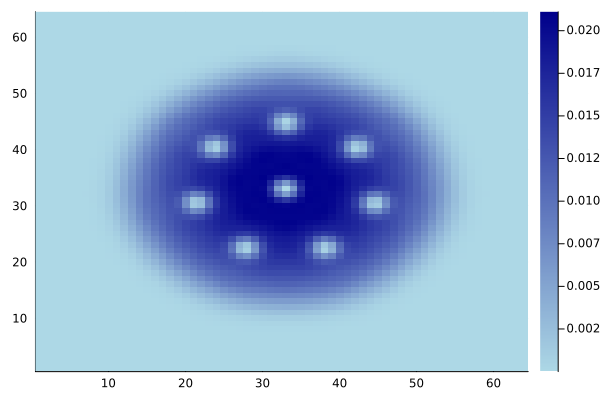

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)